In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
S0 = 100.0 # initial stock price
K = 110.0 # strike price
T = 1.0 # time to maturity
r = 0.05 # risk-free interest rate
v0 = 0.04 # initial volatility
theta = 0.04 # long-term mean of volatility
kappa = 9.0 # mean-reversion speed of volatility
sigma = 0.3 # volatility of volatility
rho = -0.5 # correlation between stock price and volatility

In [15]:
# Chooser Option Parameters
t_choice = 0.5 # time to choose between call and put
is_call = True # True for call, False for put
# Monte Carlo Simulation Parameters
M = 10000 # number of simulations
N = 100 # number of time steps
dt = T / N # time step size


In [17]:
np.random.seed(111)
S = np.zeros((M, N+1))
S[:, 0] = S0
v = np.zeros((M, N+1))
v[:, 0] = v0
for i in range(1, N+1):
  Z1 = np.random.standard_normal(M)
  Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.standard_normal(M)
  v[:, i] = np.abs(v[:, i-1] + kappa * (theta - v[:, i-1]) * dt + sigma * np.sqrt(v[:, i-1] * dt) * Z1)
  S[:, i] = S[:, i-1] * np.exp((r - 0.5 * v[:, i-1]) * dt + np.sqrt(v[:, i-1] * dt) * Z2)

In [19]:
S_choice = int(t_choice / dt)
if is_call:
  payoff = np.maximum(S[:, S_choice] - K, 0)
else:
  payoff = np.maximum(K - S[:, S_choice], 0)

option_price = np.exp(-r * (T - t_choice)) * np.mean(payoff)
std_error = np.exp(-r * (T - t_choice)) * np.std(payoff) / np.sqrt(M)


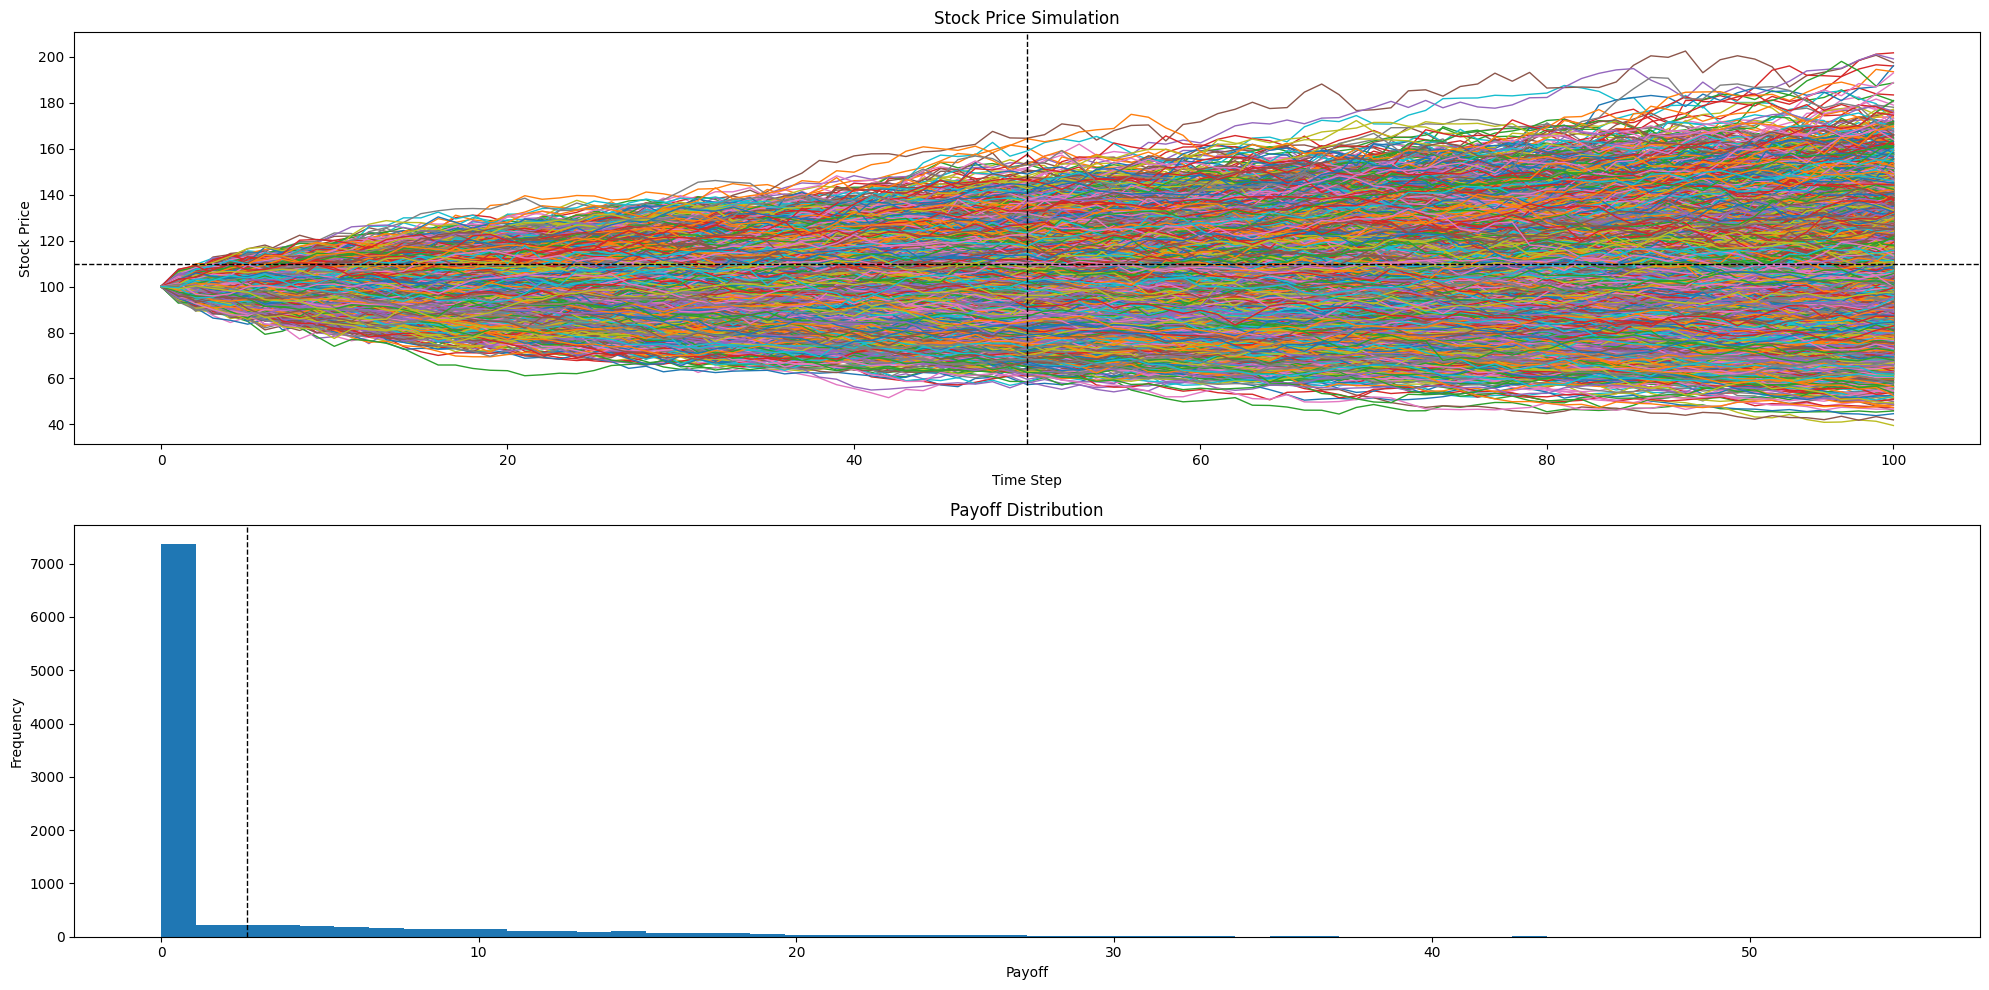

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(S.T, lw=1)
plt.axvline(S_choice, color='k', ls='--', lw=1)
plt.axhline(K, color='k', ls='--', lw=1)
plt.title('Stock Price Simulation')
plt.ylabel('Stock Price')
plt.xlabel('Time Step')
plt.subplot(2, 1, 2)
plt.hist(payoff, bins=50)
plt.axvline(option_price, color='k', ls='--', lw=1)
plt.title('Payoff Distribution')
plt.ylabel('Frequency')
plt.xlabel('Payoff')
plt.tight_layout()
plt.show()